In [1]:


import pandas as pd
import matplotlib.pyplot as plt
import os




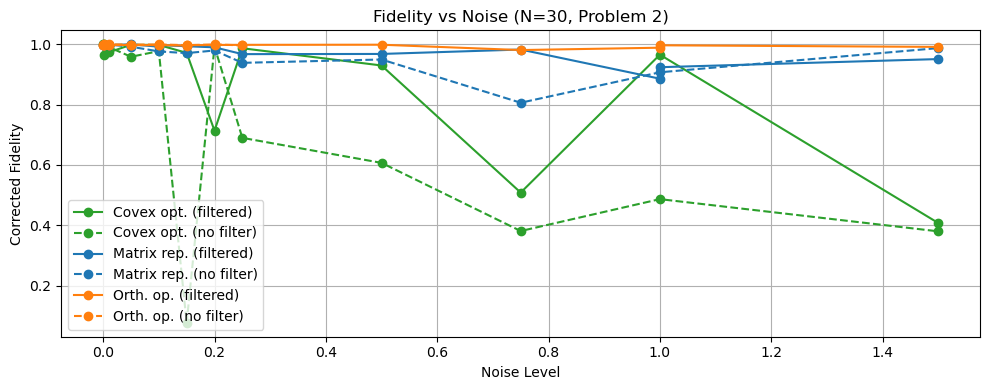

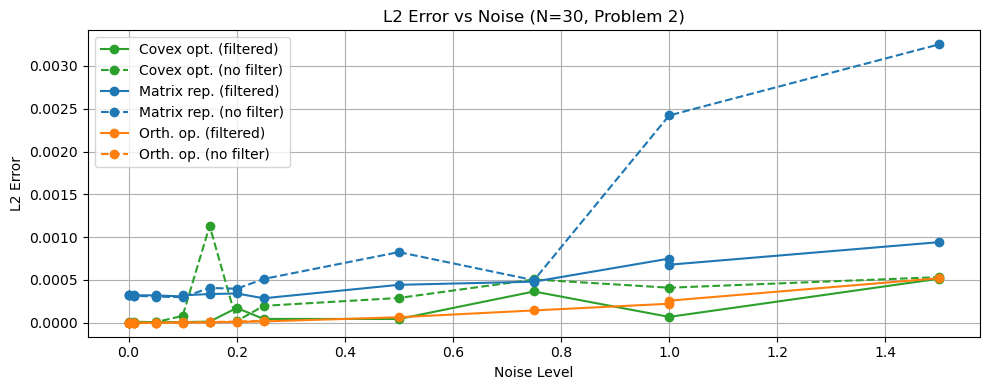

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Filenames and labels
files = [
    'max_reconstruction_results.csv',
    'Sven_reconstruction_results_noise.csv',
    'brute_reconstruction_results.csv'
]

names = {
    'max_reconstruction_results.csv': 'Matrix rep.',
    'Sven_reconstruction_results_noise.csv': 'Orth. op.',
    'brute_reconstruction_results.csv': 'Covex opt.'
}

styles = {'filtered': 'solid', 'no filter': 'dashed'}
colors = {'Matrix rep.': 'tab:blue', 'Orth. op.': 'tab:orange', 'Covex opt.': 'tab:green'}

# Load and label each file
def load_and_label(filename):
    df = pd.read_csv(filename)
    df["fidelity"] = 1 - abs(1 - df["fidelity"])  # Correct fidelity
    df["source"] = names[filename]
    return df

valid_files = [f for f in files if os.path.exists(f)]
if not valid_files:
    raise FileNotFoundError("None of the expected files were found.")

# Load all data and filter
all_data = pd.concat([load_and_label(f) for f in valid_files], ignore_index=True)
filtered = all_data[(all_data["noise"] <=2)&(all_data["N"] == 30) & (all_data["problem_id"].astype(str).isin(['2', '2nofilt']))]

# === Fidelity vs Noise ===
plt.figure(figsize=(10, 4))
for (method, pid), group in filtered.groupby(["source", "problem_id"]):
    group_sorted = group.sort_values("noise")
    filt_label = 'no filter' if pid == '2nofilt' else 'filtered'
    label = f"{method} ({filt_label})"
    plt.plot(group_sorted["noise"], group_sorted["fidelity"],
             label=label,
             color=colors[method],
             linestyle=styles[filt_label],
             marker='o')

plt.title("Fidelity vs Noise (N=30, Problem 2)")
plt.xlabel("Noise Level")
plt.ylabel("Corrected Fidelity")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === L2 vs Noise ===
plt.figure(figsize=(10, 4))
for (method, pid), group in filtered.groupby(["source", "problem_id"]):
    group_sorted = group.sort_values("noise")
    filt_label = 'no filter' if pid == '2nofilt' else 'filtered'
    label = f"{method} ({filt_label})"
    plt.plot(group_sorted["noise"], group_sorted["L2"],
             label=label,
             color=colors[method],
             linestyle=styles[filt_label],
             marker='o')

plt.title("L2 Error vs Noise (N=30, Problem 2)")
plt.xlabel("Noise Level")
plt.ylabel("L2 Error")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


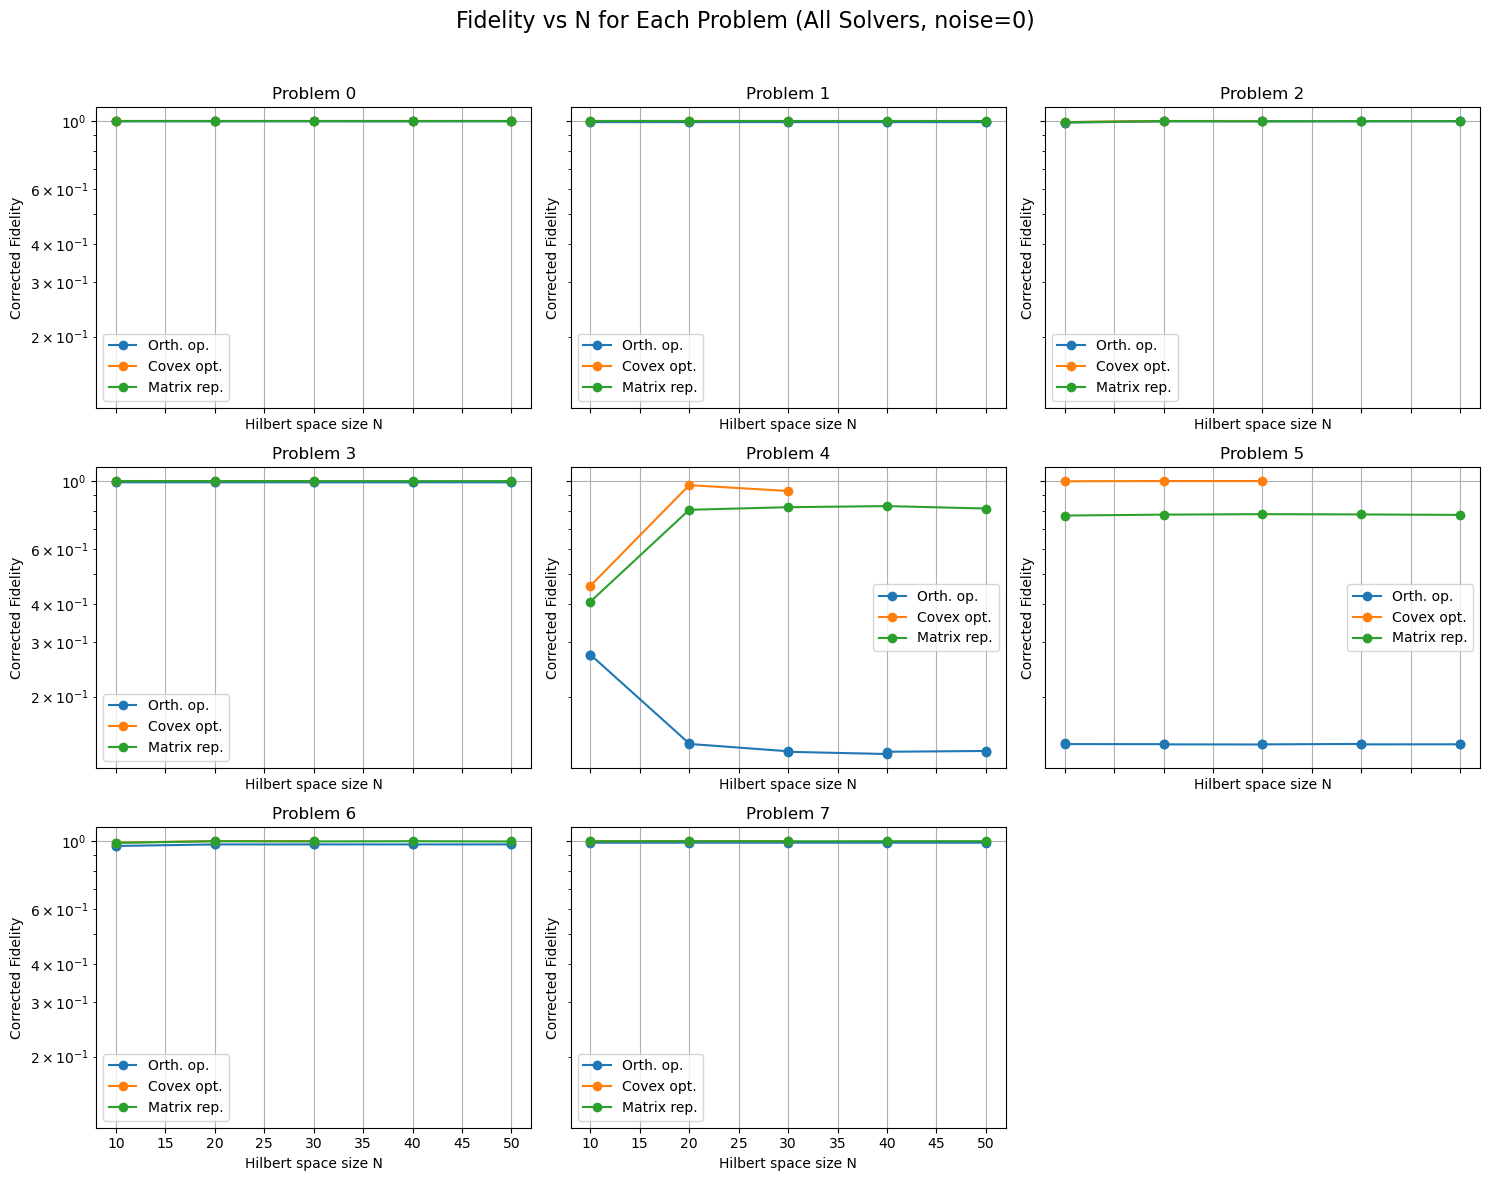

In [2]:
# Sort the data before plotting and combine all solvers in a single canvas per problem
files = ['max_reconstruction_results.csv', 'Sven_reconstruction_results_noise.csv', 'brute_reconstruction_results.csv']
valid_files = [f for f in files if os.path.exists(f)]

names = {   
    'max_reconstruction_results.csv': 'Matrix rep.',
    'Sven_reconstruction_results_noise.csv': 'Orth. op.',
    'brute_reconstruction_results.csv': 'Covex opt.'
}

# Reload and correct
def load_and_correct_fidelity(filename):
    df = pd.read_csv(filename)
    df["fidelity"] = 1 - abs(1 - df["fidelity"])
    df["source"] = os.path.splitext(filename)[0]
    return df

all_data = pd.concat([load_and_correct_fidelity(f) for f in valid_files], ignore_index=True)
filtered = all_data[all_data["noise"] == 0]

# Plotting: one subplot per problem, each with all 3 solvers
import numpy as np

unique_problems = sorted(filtered["problem_id"].unique())
num_problems = len(unique_problems)
cols = 3
rows = int(np.ceil(num_problems / cols))

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5 * cols, 4 * rows), sharex=True, sharey=True)
axes = axes.flatten()

for i, problem_id in enumerate(unique_problems):
    ax = axes[i]
    for source_file in sorted(filtered["source"].unique()):
        subset = filtered[(filtered["problem_id"] == problem_id) & (filtered["source"] == source_file)].copy()
        subset = subset.sort_values("N")
        ax.plot(subset["N"], subset["fidelity"], marker='o', label=names[source_file+".csv"])

    ax.set_title(f"Problem {problem_id}")
    ax.set_xlabel("Hilbert space size N")
    ax.set_ylabel("Corrected Fidelity")
    ax.grid(True)
    ax.legend()
    ax.set_yscale('log')

# Hide any unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.suptitle("Fidelity vs N for Each Problem (All Solvers, noise=0)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


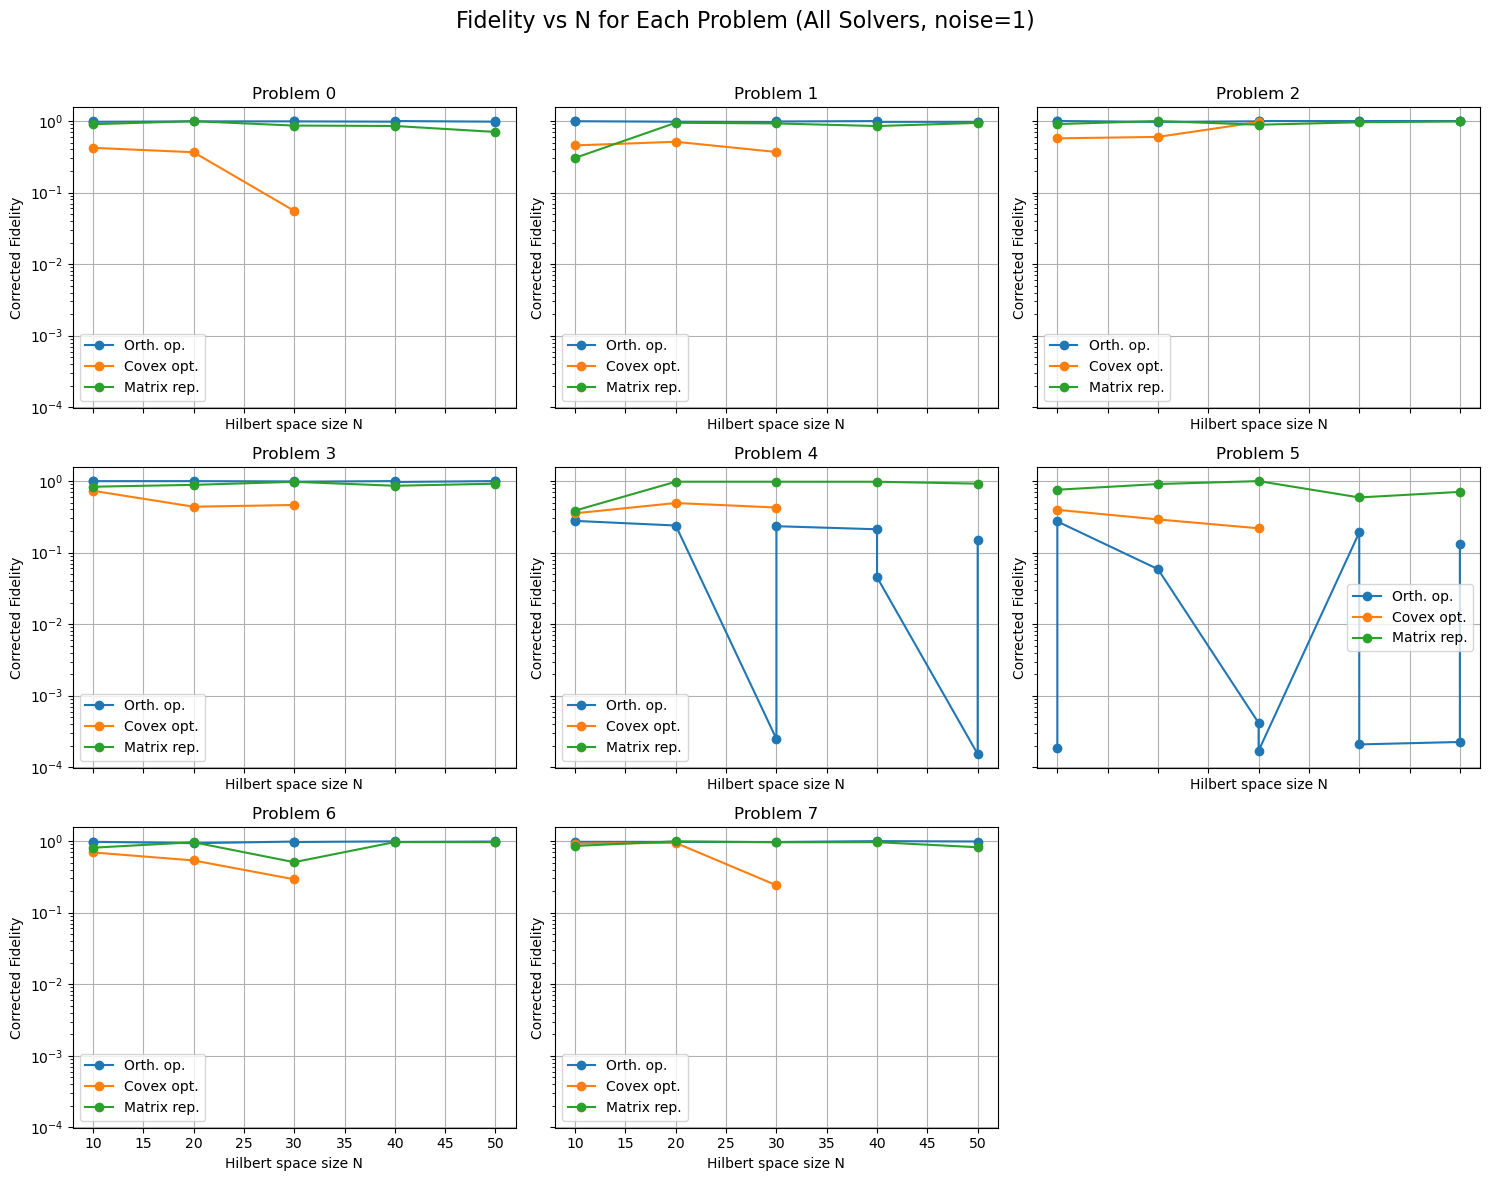

In [3]:
# Sort the data before plotting and combine all solvers in a single canvas per problem
files = ['max_reconstruction_results.csv', 'Sven_reconstruction_results_noise.csv', 'brute_reconstruction_results.csv']
valid_files = [f for f in files if os.path.exists(f)]

names = {   
    'max_reconstruction_results.csv': 'Matrix rep.',
    'Sven_reconstruction_results_noise.csv': 'Orth. op.',
    'brute_reconstruction_results.csv': 'Covex opt.'
}

# Reload and correct
def load_and_correct_fidelity(filename):
    df = pd.read_csv(filename)
    df["fidelity"] = 1 - abs(1 - df["fidelity"])
    df["source"] = os.path.splitext(filename)[0]
    return df

all_data = pd.concat([load_and_correct_fidelity(f) for f in valid_files], ignore_index=True)
filtered = all_data[all_data["noise"] == 1]

# Plotting: one subplot per problem, each with all 3 solvers
import numpy as np

unique_problems = sorted(filtered["problem_id"].unique())
num_problems = len(unique_problems)
cols = 3
rows = int(np.ceil(num_problems / cols))

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5 * cols, 4 * rows), sharex=True, sharey=True)
axes = axes.flatten()

for i, problem_id in enumerate(unique_problems):
    ax = axes[i]
    for source_file in sorted(filtered["source"].unique()):
        subset = filtered[(filtered["problem_id"] == problem_id) & (filtered["source"] == source_file)].copy()
        subset = subset.sort_values("N")
        ax.plot(subset["N"], subset["fidelity"], marker='o', label=names[source_file+".csv"])

    ax.set_title(f"Problem {problem_id}")
    ax.set_xlabel("Hilbert space size N")
    ax.set_ylabel("Corrected Fidelity")
    ax.grid(True)
    ax.legend()
    ax.set_yscale('log')

# Hide any unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.suptitle("Fidelity vs N for Each Problem (All Solvers, noise=1)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


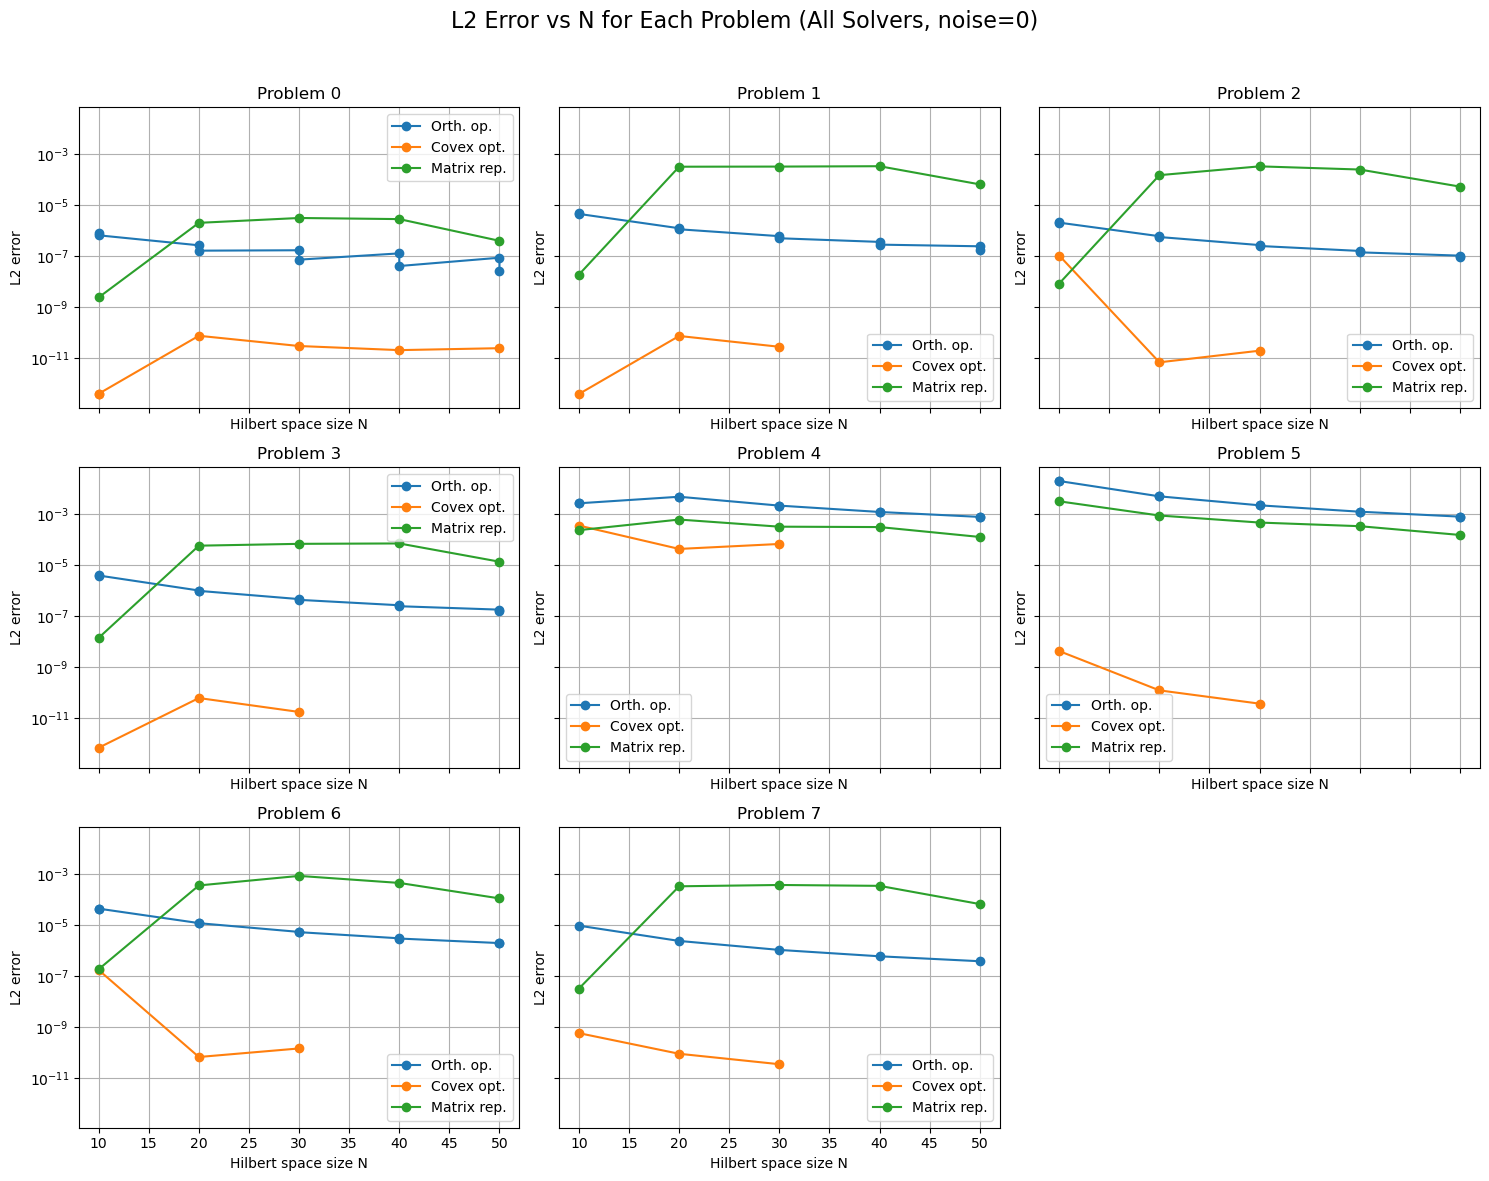

In [4]:
# Replace fidelity with L2 in the plotting logic

# Check for files again
files = ['max_reconstruction_results.csv', 'Sven_reconstruction_results_noise.csv', 'brute_reconstruction_results.csv']

names = {   
    'max_reconstruction_results.csv': 'Matrix rep.',
    'Sven_reconstruction_results_noise.csv': 'Orth. op.',
    'brute_reconstruction_results.csv': 'Covex opt.'
}
valid_files = [f for f in files if os.path.exists(f)]

def load_and_correct_fidelity(filename):
    df = pd.read_csv(filename)
    df["fidelity"] = 1 - abs(1 - df["fidelity"])
    df["source"] = os.path.splitext(filename)[0]
    return df

if not valid_files:
    raise FileNotFoundError("No valid input CSV files found.")

# Reload, correct fidelity, and filter noise = 0
all_data = pd.concat([load_and_correct_fidelity(f) for f in valid_files], ignore_index=True)
filtered = all_data[all_data["noise"] == 0]

# Unique problems
import numpy as np
unique_problems = sorted(filtered["problem_id"].unique())
sources = sorted(filtered["source"].unique())
num_problems = len(unique_problems)
cols = 3
rows = int(np.ceil(num_problems / cols))

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5 * cols, 4 * rows), sharex=True, sharey=True)
axes = axes.flatten()

# Plot L2 vs N
for i, problem_id in enumerate(unique_problems):
    ax = axes[i]
    for source_file in sources:
        subset = filtered[(filtered["problem_id"] == problem_id) & (filtered["source"] == source_file)].copy()
        subset = subset.sort_values("N")
        ax.plot(subset["N"], subset["L2"], marker='o', label=names[source_file+".csv"])

    ax.set_title(f"Problem {problem_id}")
    ax.set_xlabel("Hilbert space size N")
    ax.set_ylabel("L2 error")
    ax.grid(True)
    ax.legend()
    ax.set_yscale('log')

# Hide unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.suptitle("L2 Error vs N for Each Problem (All Solvers, noise=0)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


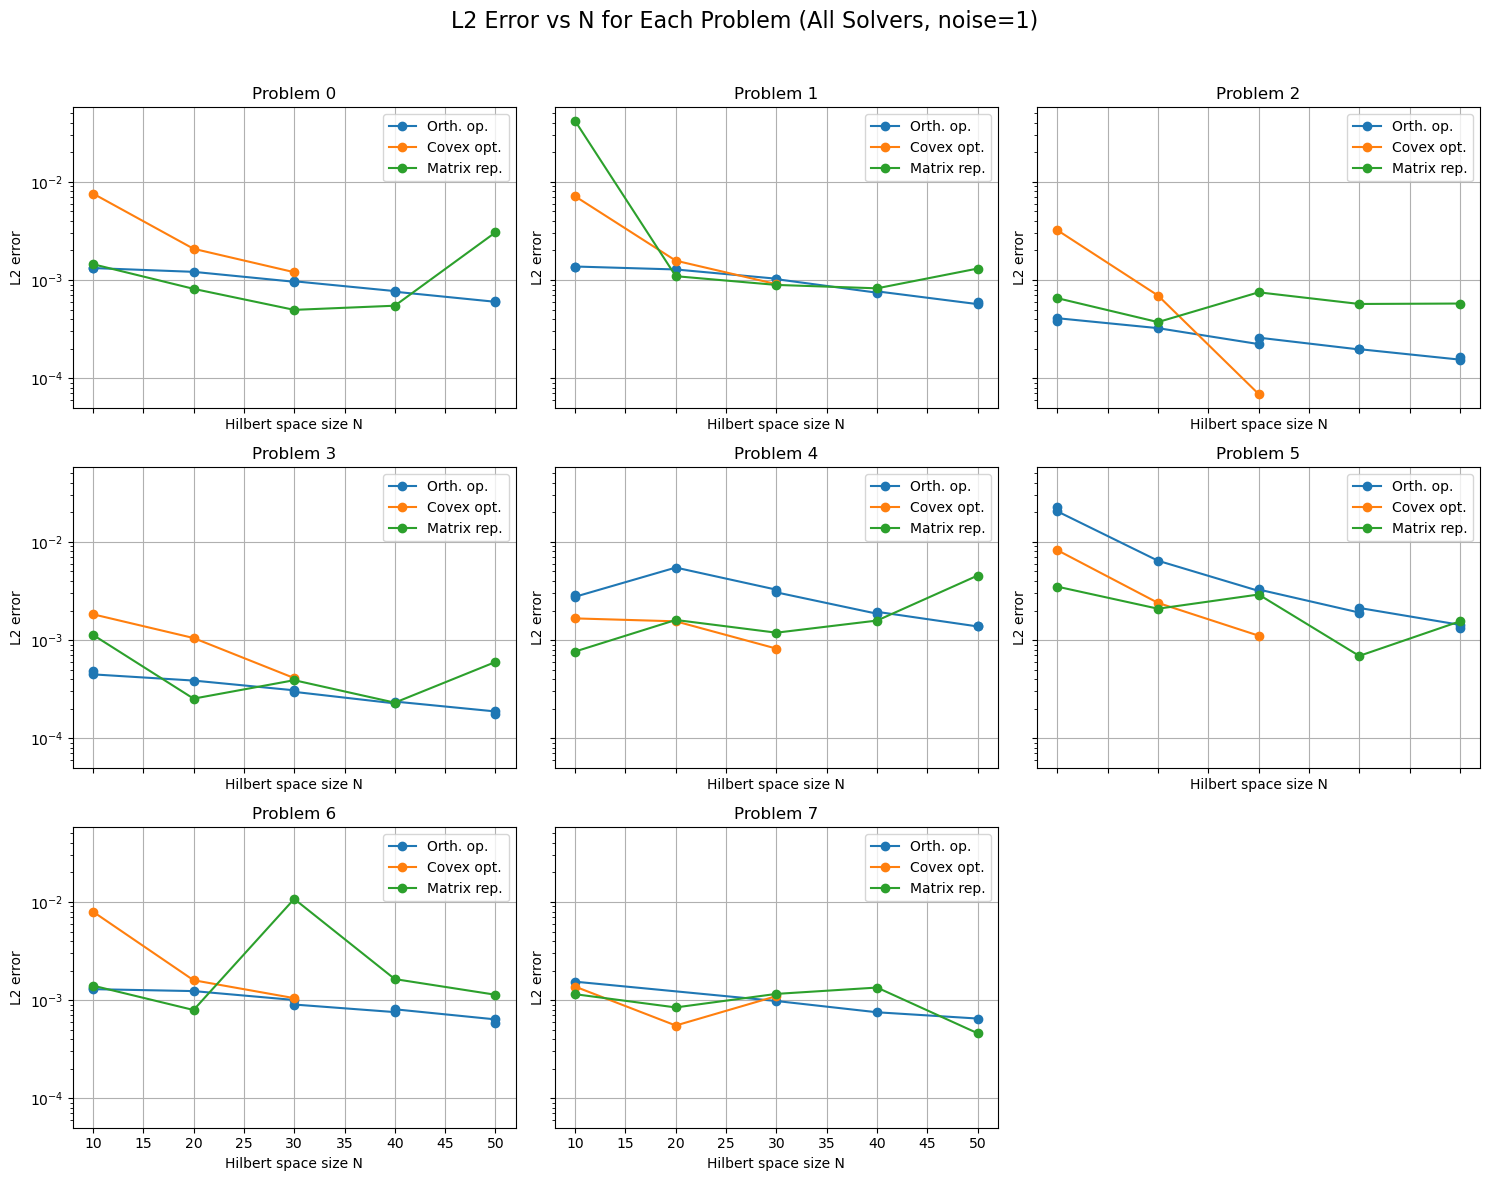

In [5]:
# Replace fidelity with L2 in the plotting logic

# Check for files again
files = ['max_reconstruction_results.csv', 'Sven_reconstruction_results_noise.csv', 'brute_reconstruction_results.csv']

names = {   
    'max_reconstruction_results.csv': 'Matrix rep.',
    'Sven_reconstruction_results_noise.csv': 'Orth. op.',
    'brute_reconstruction_results.csv': 'Covex opt.'
}
valid_files = [f for f in files if os.path.exists(f)]

def load_and_correct_fidelity(filename):
    df = pd.read_csv(filename)
    df["fidelity"] = 1 - abs(1 - df["fidelity"])
    df["source"] = os.path.splitext(filename)[0]
    return df

if not valid_files:
    raise FileNotFoundError("No valid input CSV files found.")

# Reload, correct fidelity, and filter noise = 0
all_data = pd.concat([load_and_correct_fidelity(f) for f in valid_files], ignore_index=True)
filtered = all_data[all_data["noise"] == 1]

# Unique problems
import numpy as np
unique_problems = sorted(filtered["problem_id"].unique())
sources = sorted(filtered["source"].unique())
num_problems = len(unique_problems)
cols = 3
rows = int(np.ceil(num_problems / cols))

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5 * cols, 4 * rows), sharex=True, sharey=True)
axes = axes.flatten()

# Plot L2 vs N
for i, problem_id in enumerate(unique_problems):
    ax = axes[i]
    for source_file in sources:
        subset = filtered[(filtered["problem_id"] == problem_id) & (filtered["source"] == source_file)].copy()
        subset = subset.sort_values("N")
        ax.plot(subset["N"], subset["L2"], marker='o', label=names[source_file+".csv"])

    ax.set_title(f"Problem {problem_id}")
    ax.set_xlabel("Hilbert space size N")
    ax.set_ylabel("L2 error")
    ax.grid(True)
    ax.legend()
    ax.set_yscale('log')

# Hide unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.suptitle("L2 Error vs N for Each Problem (All Solvers, noise=1)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


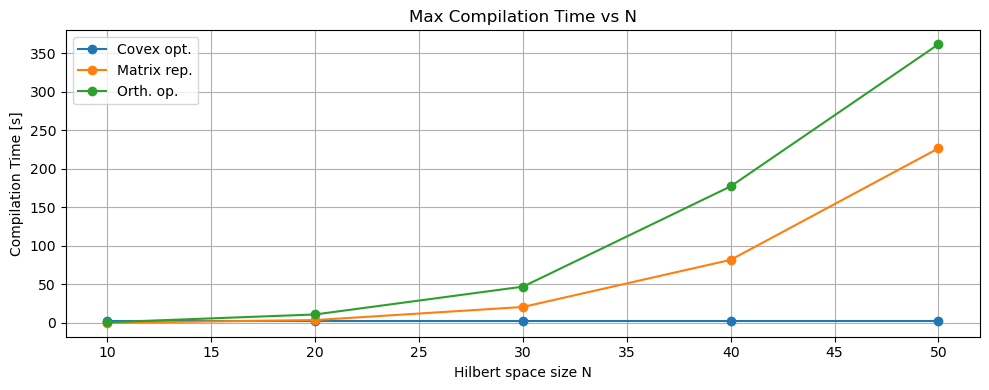

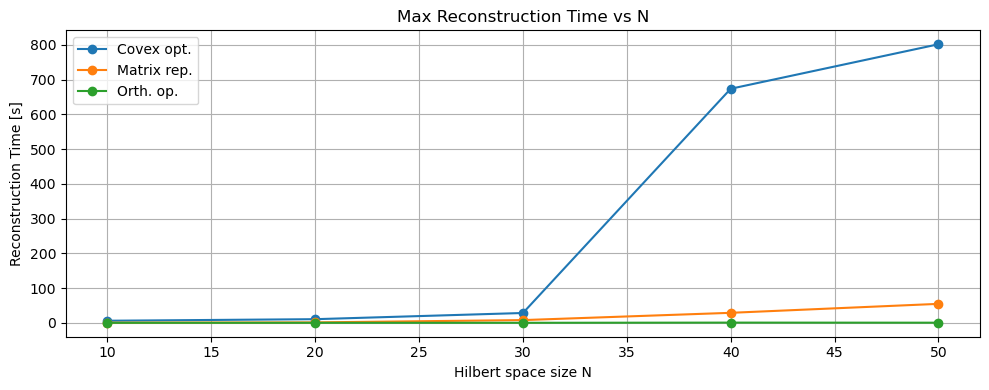

In [6]:
# Load, correct, and analyze max compilation and reconstruction times across problems

files = ['max_reconstruction_results.csv', 'Sven_reconstruction_results_noise.csv', 'brute_reconstruction_results.csv']
valid_files = [f for f in files if os.path.exists(f)]

names = {
    'max_reconstruction_results.csv': 'Matrix rep.',
    'Sven_reconstruction_results_noise.csv': 'Orth. op.',
    'brute_reconstruction_results.csv': 'Covex opt.'
}

# Load and tag source
def load_file(filename):
    df = pd.read_csv(filename)
    df["source"] = names[filename]
    return df

all_data = pd.concat([load_file(f) for f in valid_files], ignore_index=True)

# Filter for noise=0 only
filtered = all_data[all_data["noise"] == 0]

# Group by source and N, take the max time
comp_times = filtered.groupby(["source", "N"])["compilation_time"].max().reset_index()
recon_times = filtered.groupby(["source", "N"])["reconstruction_time"].max().reset_index()

# Plot compilation_time
plt.figure(figsize=(10, 4))
for label, group in comp_times.groupby("source"):
    group_sorted = group.sort_values("N")
    plt.plot(group_sorted["N"], group_sorted["compilation_time"], marker='o', label=label)

plt.title("Max Compilation Time vs N")
plt.xlabel("Hilbert space size N")
plt.ylabel("Compilation Time [s]")
plt.legend()
plt.grid(True)
plt.tight_layout()
# plt.log()
# plt.xscale('log')
# plt.yscale('log')
plt.show()

# Plot reconstruction_time
plt.figure(figsize=(10, 4))
for label, group in recon_times.groupby("source"):
    group_sorted = group.sort_values("N")
    plt.plot(group_sorted["N"], group_sorted["reconstruction_time"], marker='o', label=label)

plt.title("Max Reconstruction Time vs N")
plt.xlabel("Hilbert space size N")
plt.ylabel("Reconstruction Time [s]")
plt.legend()
plt.grid(True)
plt.tight_layout()
# plt.xscale('log')
# plt.yscale('log')
plt.show()
